The amount of data read from accelerometer is 1 entries
This data contains 0 steps according to current algorithm


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide


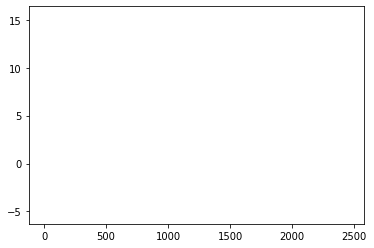

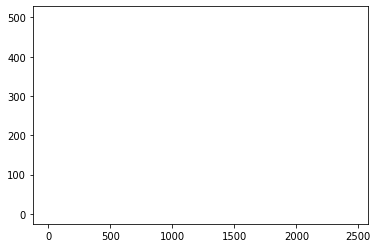

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig
import numpy as np
from math import pi
#Simple function to visualize 4 arrays that are given to it
def visualize_data(timestamps, x_arr,y_arr,z_arr,s_arr):
  #Plotting accelerometer readings
  plt.figure(1)
  plt.plot(timestamps, x_arr, color = "blue",linewidth=1.0)
  plt.plot(timestamps, y_arr, color = "red",linewidth=1.0)
  plt.plot(timestamps, z_arr, color = "green",linewidth=1.0)
  plt.show()
  #magnitude array calculation
  m_arr = []
  for i, x in enumerate(x_arr):
    m_arr.append(magnitude(x_arr[i],y_arr[i],z_arr[i]))
  plt.figure(2)
  #plotting magnitude and steps
  plt.plot(timestamps, s_arr, color = "black",linewidth=1.0)
  plt.plot(timestamps, m_arr, color = "red",linewidth=1.0)
  plt.show()
 

#Function to read the data from the log file
#TODO Read the measurements into array variables and return them
def read_data(filename):
  #TODO implementation
  columns = ['timestamps', 'x_array', 'y_array', 'z_array']
  data = pd.read_csv("/content/drive/My Drive/MultiSensing/out.csv", names=columns)
  timestamps = data['timestamps'].values
  x_array = data['x_array'].values
  y_array = data['y_array'].values
  z_array = data['z_array'].values
  return [timestamps], [x_array], [y_array], [z_array]
  #return [0],[0],[0],[0]
 
#Function to count steps.
#Should return an array of timestamps from when steps were detected.
#Each value in this arrray should represent the time that step was made.
def count_steps(timestamps, x_arr, y_arr, z_arr):
#TODO: Actual implementation

#Apply Lowpass filter on total data and get gravitational_acceleration(x_g , ....)
  x_g = lowpass_butter(x_arr)
  y_g = lowpass_butter(y_arr)
  z_g = lowpass_butter(z_arr)
# user_Acceleration = total - gravitational_acceleration(x_u, .....)
  x_u = x_arr - x_g
  y_u = y_arr - y_g
  z_u = z_arr - z_g
#Dot Product
#a_t = np.dot(x_u,np.dot(y_u,z_u))
  dot_product = dot_production(x_u, x_g, y_u, y_g, z_u, z_g)
#lowpass filter on Dot product
  a_t_low = lowpass_butter(dot_product)
#highpass filter on a_t_low
  a_t_high = highpass_butter(a_t_low)
#find peaks
  #The timestamps of the steps:
  #peaks, _ = sig.find_peaks(a_t_high)
  #the amount of dot product(a_t_high) in step timestamps:
  #peaks_val = a_t_high[peaks]
  #To avoid double counting steps:
  peaks_x, peaks_y = remove_noise(a_t_high,0.2)
  
  rv = []
  for i, time in enumerate(timestamps):
    if(i==0):
      rv.append(time)
  return peaks_x
 
def lowpass_butter(data):
    n = 4
    fs = 1000
    cutoff = 100
    nyq = 0.5* fs
    normal_fc = cutoff / nyq
    b, a = sig.butter(n, normal_fc, btype='lowpass')
    low_filtered_data = sig.lfilter(b, a, data)
    return low_filtered_data

def highpass_butter(data):
    n = 4
    fs = 1000
    cutoff = 100
    nyq = 0.5* fs
    normal_fc = cutoff / nyq
    b, a = sig.butter(n, normal_fc, btype='highpass')
    high_filtered_data = sig.lfilter(b, a, data)
    return high_filtered_data

def dot_production(x_u, x_g, y_u, y_g, z_u, z_g):
    sum_product = []
    for i in range(len(x_u)):
        sum_product.append((x_u[i] * x_g[i]) +
                           (y_u[i] * y_g[i]) +
                           (z_u[i] * z_g[i]))
    return sum_product

def remove_noise(data, threshold):
  mean = sum(data)/len(data)
  std_dev = (sum([(val-mean)**2 for val in data])/(len(data)-1))**0.5
  peaks_x = []
  for i in range(1, len(data)-1):
    if (abs(data[i]-mean)> threshold*std_dev):
      if data[i] > threshold:
        peaks_x.append(i)              
  peaks_y = [data[index] for index in peaks_x]
  return peaks_x, peaks_y
  


#Calculate the magnitude of the given vector
def magnitude(x,y,z):
  return np.linalg.norm((x,y,z))
 
  
#Function to convert array of times where steps happened into array to give into graph visualization
#Takes timestamp-array and array of times that step was detected as an input
#Returns an array where each entry is either zero if corresponding timestamp has no step detected or 50000 if the step was detected
def generate_step_array(timestamps, step_time):
  s_arr = []
  ctr = 0
  for i, time in enumerate(timestamps):
    if(ctr<len(step_time) and step_time[ctr]<=time):
      ctr += 1
      s_arr.append( 50000 )
    else:
      s_arr.append( 0 )
  while(len(s_arr)<len(timestamps)):
    s_arr.append(0)
  return s_arr
 
 
 
#Check that the sizes of arrays match
def check_data(t,x,y,z):
  if( len(t)!=len(x) or len(y)!=len(z) or len(x)!=len(y) ):
    print("Arrays of incorrect length")
    return False
  print("The amount of data read from accelerometer is "+str(len(t))+" entries")
  return True
 
 
 
def main():
  #read data from a measurement file, change the inoput file name if needed
  timestamps, x_array, y_array, z_array = read_data("out.csv")
  #Chek that the data does not produce errors
  if(not check_data(timestamps, x_array,y_array,z_array)):
    return
  #Count the steps based on array of measurements from accelerometer
  st = count_steps(timestamps, x_array, y_array, z_array)
  #Print the result
  print("This data contains "+str(len(st))+" steps according to current algorithm")
  #convert array of step times into graph-compatible format
  s_array = generate_step_array(timestamps, st)
  #visualize data and steps
  visualize_data(timestamps, x_array,y_array,z_array,s_array)






 
main()